In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

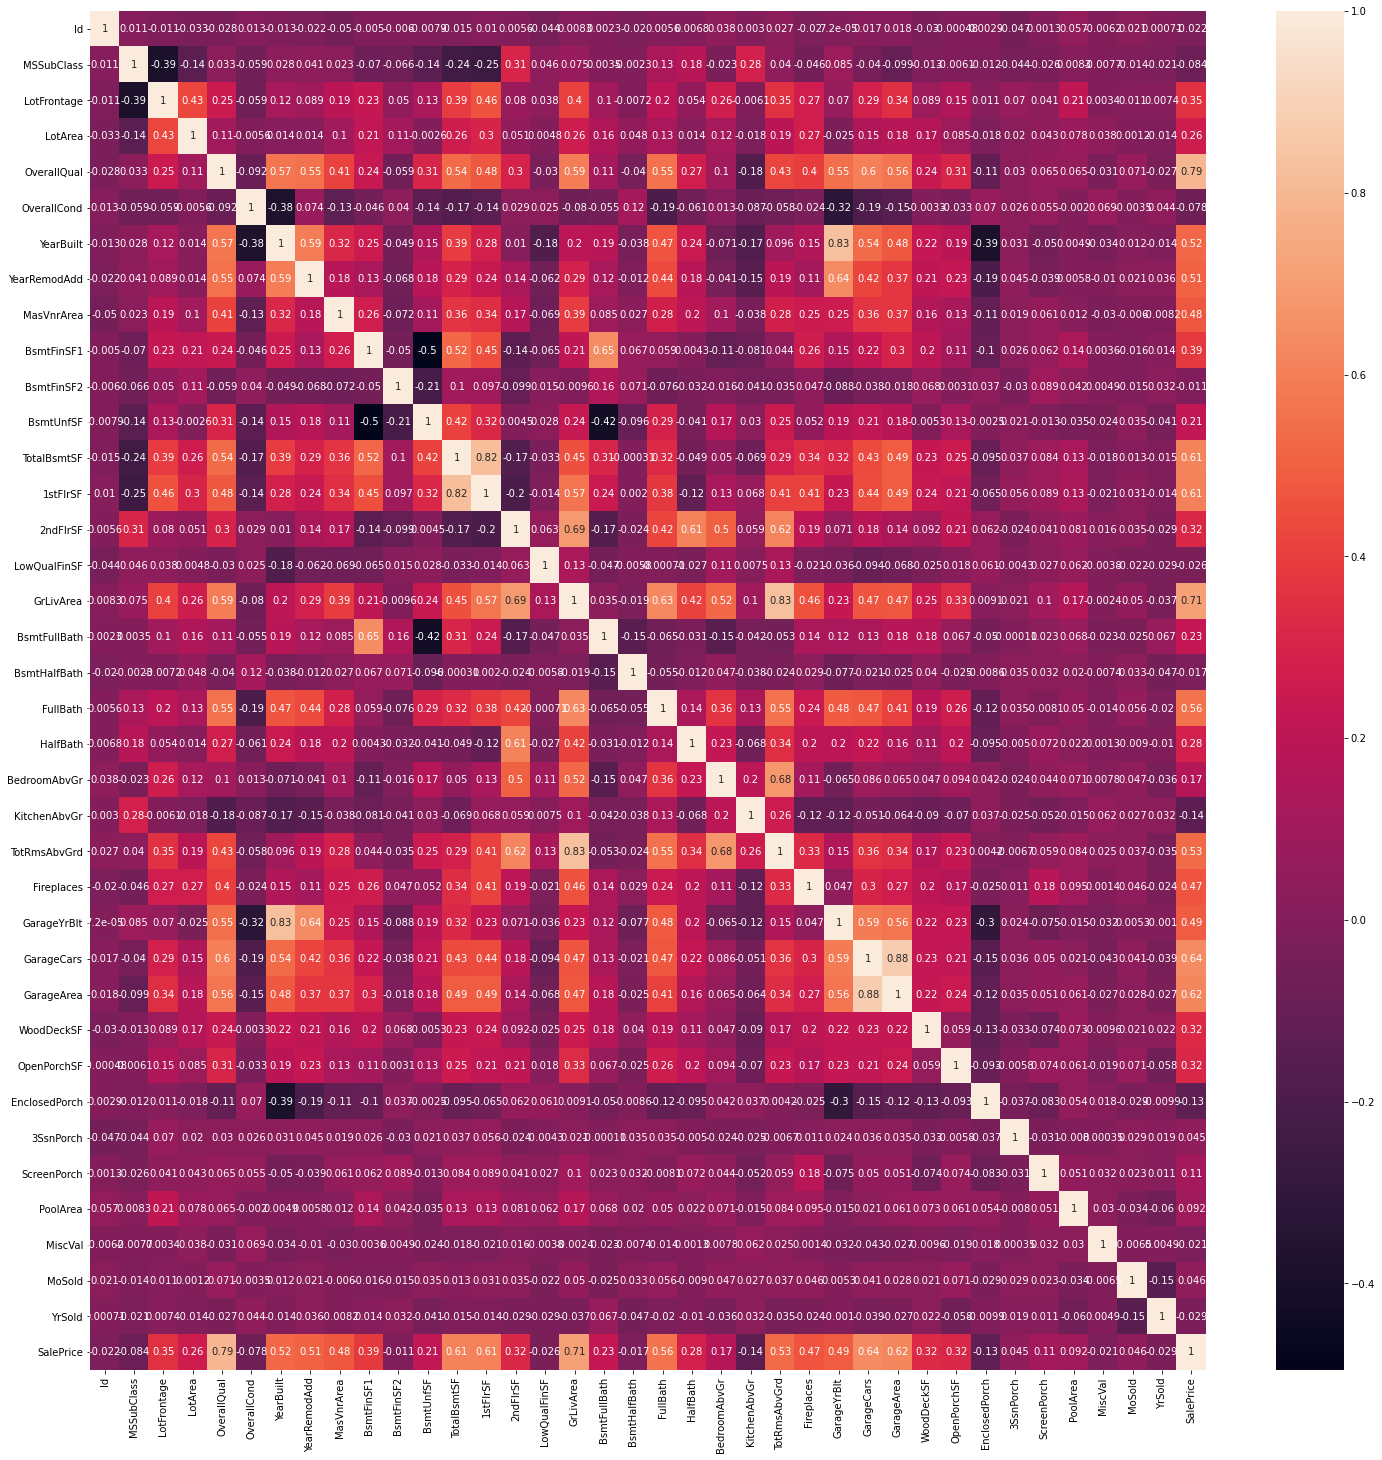

In [5]:
corr_matrix = dataset.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [6]:
#garagecars, totalbsmtsf, yearbuilt,TotRmsAbvGrd,overallQual to drop

In [7]:
final_data = dataset
y = final_data.iloc[:,-1].values

In [8]:
final_data.drop(final_data.columns.difference(['OverallQual','GarageArea','YearBuilt','GrLivArea','TotRmsAbvGrd',]), 1, inplace=True)

In [9]:
final_data.isnull().sum()

OverallQual     0
YearBuilt       0
GrLivArea       0
TotRmsAbvGrd    0
GarageArea      0
dtype: int64

In [10]:
print(final_data)

      OverallQual  YearBuilt  GrLivArea  TotRmsAbvGrd  GarageArea
0               7       2003       1710             8         548
1               6       1976       1262             6         460
2               7       2001       1786             6         608
3               7       1915       1717             7         642
4               8       2000       2198             9         836
...           ...        ...        ...           ...         ...
1455            6       1999       1647             7         460
1456            6       1978       2073             7         500
1457            7       1941       2340             9         252
1458            5       1950       1078             5         240
1459            5       1965       1256             6         276

[1460 rows x 5 columns]


In [11]:
X = final_data.iloc[:,:].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [13]:
#Linear Reg

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
accuracy_LinReg = regressor.score(X_test,y_test)
accuracy_LinReg

0.7700686169649893

In [17]:
#Decision Tree Reg

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
accuracy_dtr = dtr.score(X_test,y_test)
accuracy_dtr

0.729657454299188

In [20]:
#RandomForest Reg

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators =10,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
accuracy_rfr = rfr.score(X_test,y_test)
accuracy_rfr

0.8470342385026514

In [23]:
#XGBoost

In [24]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(random_state =0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
accuracy_xgbr = xgbr.score(X_test,y_test)
accuracy_xgbr

0.8446536381624375